In [ ]:
import pandas as pd

# ===============================
# 1. Charger les données
# ===============================
print("🔄 Chargement du dataset...")

df = pd.read_csv(
    "dataset_final_levels.csv",
    sep='\t',
    on_bad_lines='skip',
    engine='python',
    encoding='utf-8',
    quoting=3
)

print(f"✓ Chargé: {df.shape[0]:,} lignes, {df.shape[1]} colonnes")

# ===============================
# 2. Nettoyer les noms de colonnes
# ===============================
df.columns = df.columns.str.strip().str.replace('"', '').str.replace(';', '')

# ===============================
# 3. Sélectionner les colonnes Q qui existent
# ===============================
q_columns = []

for i in range(1, 43):  # Q1 à Q42
    for t in ['A', 'I', 'E']:
        col_name = f'Q{i}{t}'
        if col_name in df.columns:
            q_columns.append(col_name)

print(f"✓ Colonnes Q trouvées: {len(q_columns)}")

# ===============================
# 4. Ajouter les 4 colonnes démographiques
# ===============================
demo_columns = ['married', 'education', 'age', 'gender']
keep_columns = q_columns + demo_columns

# ===============================
# 5. Filtrer le dataframe
# ===============================
df = df[keep_columns]

print("\n" + "="*50)
print("DATASET FINAL")
print("="*50)
print(f"Shape: {df.shape}")
print(f"Total colonnes: {len(df.columns)}")
print(f"  - Questions Q: {len(q_columns)}")
print(f"  - Démographiques: 4")

print(f"\nPremières 10 colonnes: {list(df.columns[:10])}")
print(f"Dernières 10 colonnes: {list(df.columns[-10:])}")

# ===============================
# 6. Nettoyer les valeurs
# ===============================
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip().str.replace('"', '')

print(f"\n✓ Valeurs nettoyées")

# ===============================
# 7. Afficher un aperçu
# ===============================
print(f"\nAperçu des données:")
print(df.head())

print(f"\nInfo sur les colonnes démographiques:")
print(f"  Age: min={df['age'].min()}, max={df['age'].max()}, mean={df['age'].mean():.1f}")
print(f"  Gender: {df['gender'].value_counts().to_dict()}")
print(f"  Education: {df['education'].value_counts().to_dict()}")
print(f"  Married: {df['married'].value_counts().to_dict()}")

print(f"\nValeurs manquantes: {df.isnull().sum().sum():,}")


🔄 Chargement du dataset...
✓ Chargé: 39,772 lignes, 172 colonnes
✓ Colonnes Q trouvées: 126

DATASET FINAL
Shape: (39772, 130)
Total colonnes: 130
  - Questions Q: 126
  - Démographiques: 4

Premières 10 colonnes: ['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A']
Dernières 10 colonnes: ['Q41A', 'Q41I', 'Q41E', 'Q42A', 'Q42I', 'Q42E', 'married', 'education', 'age', 'gender']

✓ Valeurs nettoyées

Aperçu des données:
  Q1A  Q1I   Q1E  Q2A  Q2I   Q2E  Q3A  Q3I   Q3E  Q4A  ...  Q41A  Q41I  Q41E  \
0   4   28  3890    4   25  2122    2   16  1944    4  ...     4    32  1574   
1   4    2  8118    1   36  2890    2   35  4777    3  ...     2     8  1334   
2   3    7  5784    1   33  4373    4   41  3242    1  ...     1    20  2203   
3   2   23  5081    3   11  6837    2   37  5521    1  ...     4    30  3643   
4   2   36  3215    2   13  7731    3    5  4156    4  ...     4    28  1950   

   Q42A  Q42I  Q42E  married  education  age  gender  
0     4    15  2969     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39772 entries, 0 to 39771
Columns: 130 entries, Q1A to gender
dtypes: int64(129), object(1)
memory usage: 39.4+ MB


In [ ]:
# ===============================
# 8. Sauvegarder
# ===============================
output_file = "/content/data_final.csv"
df.to_csv(output_file, index=False)

print(f"\n💾 Fichier sauvegardé: {output_file}")
print(f"✅ Dataset prêt: {df.shape[0]:,} lignes × {df.shape[1]} colonnes")


💾 Fichier sauvegardé: /content/data_final.csv
✅ Dataset prêt: 39,772 lignes × 130 colonnes


In [ ]:
df.describe()

,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,...,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,married,education,age,gender
count,39772.000000,3.977200e+04,39772.000000,39772.000000,3.977200e+04,39772.000000,39772.000000,3.977200e+04,39772.000000,39772.000000,...,39772.000000,39772.000000,3.977200e+04,39772.000000,39772.000000,3.977200e+04,39772.000000,39772.000000,39772.000000,39772.000000
mean,21.555567,6.970834e+03,2.172332,21.248139,5.332504e+03,2.226089,21.583476,7.426689e+03,1.950216,21.499975,...,1.966207,21.483632,5.540815e+03,2.680152,21.462335,8.301059e+03,1.159534,2.503872,23.611913,1.789525
std,12.133887,8.670840e+04,1.111573,12.125392,2.651460e+04,1.038508,12.115803,1.587083e+05,1.042235,12.152184,...,1.046270,12.114847,5.978512e+04,1.032525,12.143782,7.765370e+04,0.445878,0.885437,21.582156,0.444193
min,1.000000,1.800000e+02,1.000000,1.000000,1.760000e+02,1.000000,1.000000,-1.081400e+04,1.000000,1.000000,...,1.000000,1.000000,-1.590000e+02,1.000000,1.000000,1.780000e+02,0.000000,0.000000,13.000000,0.000000
25%,11.000000,2.664000e+03,1.000000,11.000000,2.477000e+03,1.000000,11.000000,2.857000e+03,1.000000,11.000000,...,1.000000,11.000000,2.237000e+03,2.000000,11.000000,3.070000e+03,1.000000,2.000000,18.000000,2.000000
50%,22.000000,3.608500e+03,2.000000,21.000000,3.511000e+03,2.000000,22.000000,3.898000e+03,2.000000,21.000000,...,2.000000,21.000000,3.052000e+03,3.000000,21.000000,4.373500e+03,1.000000,3.000000,21.000000,2.000000
75%,32.000000,5.358000e+03,3.000000,32.000000,5.216000e+03,3.000000,32.000000,5.766000e+03,3.000000,32.000000,...,3.000000,32.000000,4.518000e+03,4.000000,32.000000,6.682250e+03,1.000000,3.000000,25.000000,2.000000
max,42.000000,1.210228e+07,4.000000,42.000000,2.161057e+06,4.000000,42.000000,2.858269e+07,4.000000,42.000000,...,4.000000,42.000000,8.021110e+06,4.000000,42.000000,7.750098e+06,3.000000,4.000000,1998.000000,3.000000


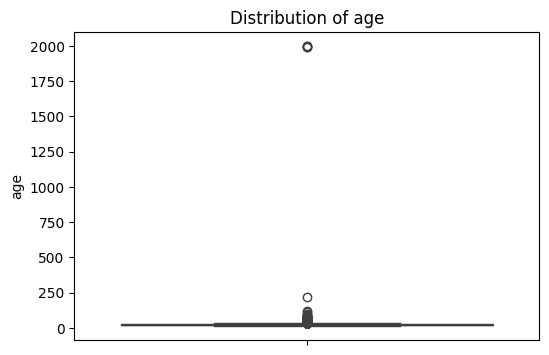

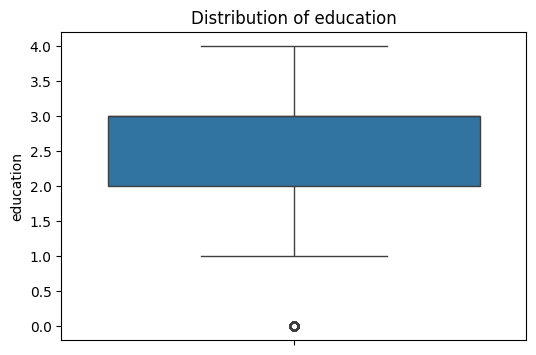

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colonnes spécifiques
colonnes_a_afficher = ['age', 'education']

for col in colonnes_a_afficher:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# ===============================
# Méthode 3: Limites manuelles
# ===============================
print(f"Shape avant: {df.shape}")

# Supprimer les âges aberrants (par exemple: garder 13-100 ans)
df = df[(df['age'] >= 13) & (df['age'] <= 100)]
print(f"Age outliers supprimés")

print(f"\nShape après: {df.shape}")

Shape avant: (39772, 130)
Age outliers supprimés

Shape après: (39765, 130)


In [ ]:
depression_cols = ["Q3A","Q5A","Q10A","Q13A","Q16A","Q17A","Q21A",
                   "Q24A","Q26A","Q31A","Q34A","Q37A","Q38A","Q42A"]

anxiety_cols = ["Q2A","Q4A","Q7A","Q9A","Q15A","Q19A","Q20A",
                "Q23A","Q25A","Q28A","Q30A","Q36A","Q40A","Q41A"]

stress_cols = ["Q1A","Q6A","Q8A","Q11A","Q12A","Q14A","Q18A",
               "Q22A","Q27A","Q29A","Q32A","Q33A","Q35A","Q39A"]

# Combine all question columns that need to be numeric
all_q_cols_for_scoring = list(set(depression_cols + anxiety_cols + stress_cols))

# Convert these columns to numeric, coercing errors
for col in all_q_cols_for_scoring:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df["Depression_score"] = df[depression_cols].sum(axis=1)
df["Anxiety_score"] = df[anxiety_cols].sum(axis=1)
df["Stress_score"] = df[stress_cols].sum(axis=1)

In [ ]:
df[["Depression_score","Anxiety_score","Stress_score"]].describe()

,Depression_score,Anxiety_score,Stress_score
count,39765.000000,39765.000000,39765.000000
mean,35.059927,30.055099,35.154508
std,12.321507,10.249130,10.522982
min,14.000000,14.000000,14.000000
25%,25.000000,22.000000,27.000000
50%,35.000000,29.000000,35.000000
75%,46.000000,37.000000,43.000000
max,56.000000,56.000000,56.000000


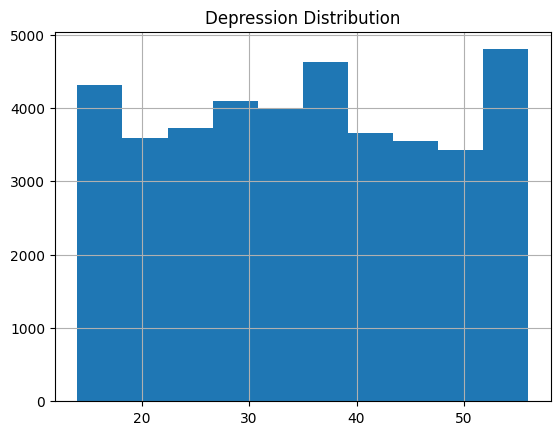

In [ ]:
import matplotlib.pyplot as plt

df["Depression_score"].hist()
plt.title("Depression Distribution")
plt.show()

In [ ]:
df.to_csv("dataset_with_scores.csv", index=False)

Create Classification Functions

In [ ]:
def classify_depression(score):
    if score <= 18:
        return "Normal"
    elif score <= 22:
        return "Mild"
    elif score <= 28:
        return "Moderate"
    elif score <= 34:
        return "Severe"
    else:
        return "Extremely Severe"


def classify_anxiety(score):
    if score <= 15:
        return "Normal"
    elif score <= 19:
        return "Mild"
    elif score <= 25:
        return "Moderate"
    elif score <= 31:
        return "Severe"
    else:
        return "Extremely Severe"


def classify_stress(score):
    if score <= 18:
        return "Normal"
    elif score <= 25:
        return "Mild"
    elif score <= 33:
        return "Moderate"
    elif score <= 41:
        return "Severe"
    else:
        return "Extremely Severe"


Apply Classification

In [ ]:
df["Depression_level"] = df["Depression_score"].apply(classify_depression)
df["Anxiety_level"] = df["Anxiety_score"].apply(classify_anxiety)
df["Stress_level"] = df["Stress_score"].apply(classify_stress)


Check Distribution

In [ ]:
print(df["Depression_level"].value_counts())
print(df["Anxiety_level"].value_counts())
print(df["Stress_level"].value_counts())

Depression_level
Extremely Severe    20049
Severe               6029
Moderate             5777
Normal               4317
Mild                 3593
Name: count, dtype: int64
Anxiety_level
Extremely Severe    16438
Moderate             8456
Severe               7984
Mild                 5017
Normal               1870
Name: count, dtype: int64
Stress_level
Extremely Severe    11997
Severe               9862
Moderate             9548
Mild                 6121
Normal               2237
Name: count, dtype: int64


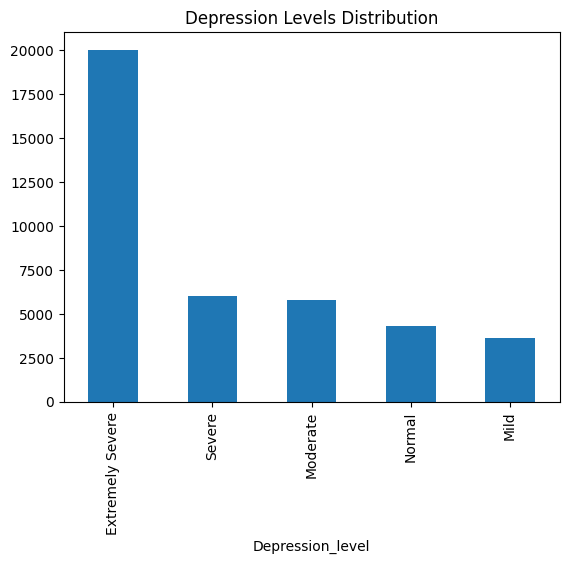

In [ ]:
df["Depression_level"].value_counts().plot(kind="bar")
plt.title("Depression Levels Distribution")
plt.show()

In [ ]:
df.to_csv("dataset_final_levels.csv", index=False)

In [ ]:
answer_cols = [col for col in df.columns if col.endswith("A")]

In [ ]:
time_cols = [col for col in df.columns if col.endswith("E")]

In [ ]:
demo_cols = ["age", "gender", "education", "married"]

In [ ]:
X = df[answer_cols + time_cols + demo_cols]

In [ ]:
y = df["Depression_level"]

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

Extremely Severe       0.95      0.99      0.97      4020
            Mild       0.81      0.74      0.78       700
        Moderate       0.82      0.84      0.83      1169
          Normal       0.94      0.93      0.94       872
          Severe       0.85      0.76      0.80      1192

        accuracy                           0.91      7953
       macro avg       0.87      0.85      0.86      7953
    weighted avg       0.90      0.91      0.90      7953

